In [11]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords 
from nltk import bigrams 
from nltk.util import ngrams

import itertools
import collections 
#install plotly express, do some bar graphs 
import matplotlib.pyplot as plt
from clean_tweet_tools.clean_tweet import clean_tweet
from nltk_tweet_tools.sentiment_scores import sentiment_analyzer_scores

In [ ]:
#TODO:
# [x] get vader sent scores
# [] plot histogram of vader score
# [] plot bigrams and bigram frequency for corpus 
# [] look into word embeddings 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergiochairez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
jan_data = pd.read_json('../data/data_json_lines/Jan.jsonl', lines=True)

In [5]:
jan_data.tail(20)

,author,timestamp,status,sentiment
1560,TUSK81,2020-01-31T14:24:430Z,"""Should the [Supreme Court] sign off on the pr...",positive
1561,MomsRising,2020-01-31T14:55:420Z,"""If #DACA is terminated, hundreds of thousands...",negative
1562,SamSenev,2020-01-31T16:11:530Z,DACA DEPORTATIONS ICE Director Albence is prep...,neutral
1563,FAIRImmigration,2020-01-31T16:30:060Z,DACA vs. Birth Tourism: Who’s ‘More’ American?...,neutral
1564,karlavaldex,2020-01-31T16:41:190Z,The future of the #DACA program is uncertain! ...,positive
1565,ChloeEast2,2020-01-31T17:30:280Z,Woo @UCDavisEcon!! Check out the great work by...,positive
1566,dykejr_,2020-01-31T17:45:590Z,so if anyone wants to help send me money for m...,positive
1567,SamSenev,2020-01-31T18:19:480Z,Utah Supreme Court approves rule allowing DACA...,positive
1568,prayingmedic,2020-01-31T18:40:360Z,"3) Seven months later, when the President said...",negative
1569,prayingmedic,2020-01-31T18:40:360Z,"2) On February 7th, 2018, Nancy Pelosi gave a ...",positive


In [15]:
len(jan_data)

1580

In [6]:
jan_data[[ 'sentiment','VADER_compound_score']] = jan_data.apply(
    lambda row: pd.Series(sentiment_analyzer_scores(clean_tweet(row['status']))), axis=1)

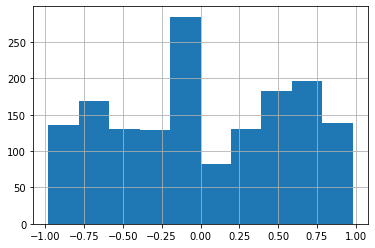

In [10]:
jan_data['VADER_compound_score'].hist()